<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/MovieReviewRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
imdb = tf.keras.datasets.imdb

In [3]:
(x_train, Y_train), (x_test, Y_test) = imdb.load_data(num_words=1000)

In [4]:
print("Review for a sample data point: ", x_train[4])
print("Label for the same sample data point: ", Y_train[4])

Review for a sample data point:  [1, 249, 2, 7, 61, 113, 10, 10, 13, 2, 14, 20, 56, 33, 2, 18, 457, 88, 13, 2, 2, 45, 2, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 2, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2, 5, 13, 16, 131, 2, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 2, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 2, 52, 725, 2, 61, 419, 11, 13, 2, 15, 2, 20, 11, 4, 2, 5, 296, 12, 2, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2, 2, 7, 2, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 2, 18, 165, 170, 143, 19, 14, 5, 2, 6, 226, 251, 7, 61, 113]
Label for the same sample data point:  0


In [5]:
vocabulary = imdb.get_word_index()
print(list(vocabulary)[:10])

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling']


In [6]:
max_words = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_words)

In [7]:
# Building the SimpleRNN model
embedding_size = 32
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(1000, embedding_size, input_length=(max_words)))
model.add(tf.keras.layers.SimpleRNN(100, return_sequences='true'))
model.add(tf.keras.layers.SimpleRNN(50, return_sequences='true'))
model.add(tf.keras.layers.SimpleRNN(25))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 500, 100)          13300     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 500, 50)           7550      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 25)                1900      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 54,776
Trainable params: 54,776
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 127s 791ms/step - loss: 0.7023 - acc: 0.5096 - val_loss: 0.7057 - val_acc: 0.4934
Epoch 2/10
157/157 [==============================] - 124s 790ms/step - loss: 0.6841 - acc: 0.5474 - val_loss: 0.6480 - val_acc: 0.6446
Epoch 3/10
157/157 [==============================] - 123s 785ms/step - loss: 0.5472 - acc: 0.7299 - val_loss: 0.5578 - val_acc: 0.7200
Epoch 4/10
157/157 [==============================] - 124s 789ms/step - loss: 0.5155 - acc: 0.7592 - val_loss: 0.5608 - val_acc: 0.7182
Epoch 5/10
157/157 [==============================] - 124s 793ms/step - loss: 0.4958 - acc: 0.7734 - val_loss: 0.4708 - val_acc: 0.7834
Epoch 6/10
157/157 [==============================] - 125s 794ms/step - loss: 0.4998 - acc: 0.7604 - val_loss: 0.5315 - val_acc: 0.7276
Epoch 7/10
157/157 [==============================] - 123s 783ms/step - loss: 0.4802 - acc: 0.7742 - val_loss: 0.5845 - val_acc: 0.7348
Epoch 8/10
157/157 [============================

In [9]:
model.evaluate(x_test, Y_test, batch_size=10)

2500/2500 [==============================] - 181s 72ms/step - loss: 0.4367 - acc: 0.8028


[0.4367322325706482, 0.802839994430542]

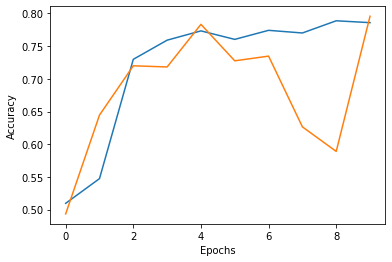

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

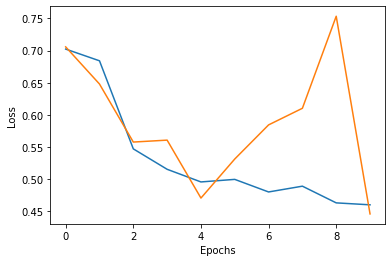

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()